# Probability Distributions

In this notebook, we will look at a few of the most common probability distributions that are found in experimental data.

If X is a random variable of some probability distribution, then we can access a number of
important statistical quantities for this distribution:

    X.pmf(k)  -> probability mass function -> P(X = k) for DISCRETE distributions!!!
    X.pdf(k)  -> probability density function -> P(X = k) for CONTINUOUS distributions!!!
    X.cdf(k)  -> cumulative distribution function -> P(X <= k)
    X.ppf(P)  -> percentile point function -> returns the X value that corresponds to integral = P
    X.mean()  -> mean value (E[X])
    X.var()   -> variance
    X.std(ddof=1)   -> standard deviation (N-1)
    X.rvs(N)   -> Get N random samples from X
    
Notes:  

P = X.cdf(k) = cumulative distribution function ... P = $\int_{-\infty}^k P(X) dX$

k = X.ppf(P) = percentile point function ... $\int_{-\infty}^k P(X) dX = P$

In [152]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats   

# Continuous Distributions

(array([2057., 1964., 1946., 2037., 1949., 2004., 1988., 2007., 1967.,
        2002., 1970., 2005., 2027., 2043., 2024., 1961., 1977., 1935.,
        2027., 1919., 1996., 2042., 1979., 2026., 1961., 2008., 2064.,
        1988., 1954., 2028., 2065., 1995., 1997., 1978., 2024., 1991.,
        2056., 1991., 2029., 1993., 1908., 1960., 2041., 1997., 2071.,
        2013., 1959., 2019., 2007., 2051.]),
 array([29.90000091, 29.90400082, 29.90800074, 29.91200066, 29.91600057,
        29.92000049, 29.92400041, 29.92800032, 29.93200024, 29.93600015,
        29.94000007, 29.94399999, 29.9479999 , 29.95199982, 29.95599974,
        29.95999965, 29.96399957, 29.96799948, 29.9719994 , 29.97599932,
        29.97999923, 29.98399915, 29.98799907, 29.99199898, 29.9959989 ,
        29.99999882, 30.00399873, 30.00799865, 30.01199856, 30.01599848,
        30.0199984 , 30.02399831, 30.02799823, 30.03199815, 30.03599806,
        30.03999798, 30.04399789, 30.04799781, 30.05199773, 30.05599764,
        30.05999

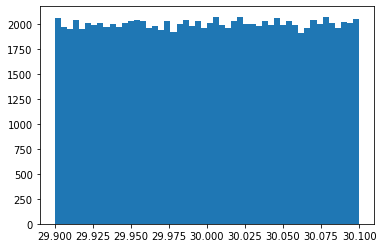

In [169]:
# generate a uniform distribution between a-b and a+b
from scipy.stats import uniform

nbins = 50

N = 100000
a = 30
b = .1

data_uniform = uniform.rvs(size=N, loc=a-b, scale=2*b)

plt.hist(data_uniform,bins=nbins)

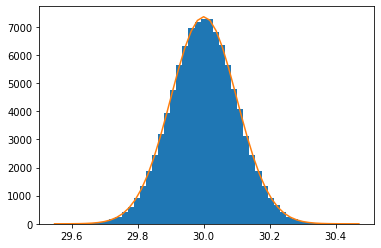

In [170]:
# generate a Gaussian distribution with mu=a and sigma=b
from scipy.stats import norm

data_normal = norm.rvs(size=N,loc=a,scale=b)

bins=np.histogram(np.hstack((data_normal)), bins=nbins)[1] #get the bin edges

start = bins[0]
width = bins[len(bins)-1]-bins[0]

xaxis = np.linspace(start,start+width,nbins)
data_normal_fit = N/nbins*width*norm.pdf(xaxis,loc=data_normal.mean(),scale=data_normal.std(ddof=1))

plt.hist(data_normal,bins=nbins)
plt.plot(xaxis,data_normal_fit)

# Comparison of Cumulative Distribution Functions


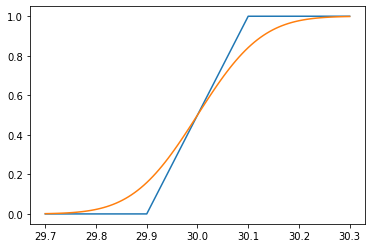

In [49]:
# look in the region between a-3b and a+3b
xaxis = np.linspace(a-3*b,a+3*b,100)

# generate the cumulative distribution functions in this range
data_uniform_cdf = uniform.cdf(xaxis,loc=a-b,scale=2*b)
data_normal_cdf = norm.cdf(xaxis,loc=a,scale=b)

# plot the results
plt.plot(xaxis,data_uniform_cdf)
plt.plot(xaxis,data_normal_cdf)

# Discrete Distributions

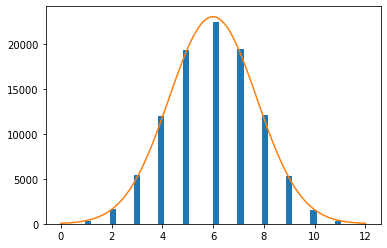

In [50]:
# generate a Binomial Distribution - flip a coin twelve times, count the number of heads
from scipy.stats import binom

nflips = 12
p = 1/2.0

npts = 100000 # do the experiment 10000 times

data_binom = binom.rvs(size=npts,p=p,n=nflips)

plt.hist(data_binom,bins=50)

# Compare to a Gaussian with the same mean and standard deviation

xaxis = np.linspace(0,nflips,10*nflips)
data_normal_binom = npts*norm.pdf(xaxis,loc=data_binom.mean(),scale=data_binom.std(ddof=1))
plt.plot(xaxis,data_normal_binom)

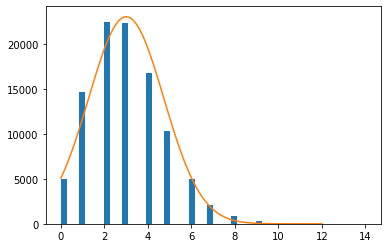

In [51]:
# generate a Poisson Distribution
from scipy.stats import poisson

mu=3.0

npts = 100000 # do the experiment 10000 times

data_poisson = poisson.rvs(size=n,mu=mu)

plt.hist(data_poisson,bins=50)

# Compare to a Gaussian with the same mean and standard deviation

xaxis = np.linspace(0,4.0*mu,int(10*4.0*mu))
data_normal_poisson = npts*norm.pdf(xaxis,loc=data_poisson.mean(),scale=data_poisson.std(ddof=1))
plt.plot(xaxis,data_normal_poisson)

# Integrals of Probability Distributions

Most often, we are interested not so much in the specific probability values, but rather in the integrals of these distributions between some limits.

Example:

We flip a fair coin 12 times.  What is the probability that we get less than 4 heads?

Answer:  

The integral of the distribution from 0 to 3, inclusive, will give us the correct answer.

In [52]:
N = 12
p = 0.5

X = binom(N,p)
k = 4

print("The probability of getting less than 4 heads is: ",X.cdf(k-1))

The probability of getting less than 4 heads is:  0.07299804687500001


In [53]:
# what is the probability that we will get between 5 and 7 heads, inclusive?

k1 = 7
k2 = 5

prob = X.cdf(k1) - X.cdf(k2-1)

print("The probability of getting between 5 and 7 heads, inclusive, is: ",prob)

The probability of getting between 5 and 7 heads, inclusive, is:  0.6123046875


In [54]:
# what is the probability of getting exactly six heads?

k = 6

print("The probability of getting exactly 6 heads is: ",X.pmf(k))

The probability of getting exactly 6 heads is:  0.22558593749999972


Gaussian distribution: (0.033614388208863935, 1.0350846417161685) -> (0.8311014668355969, 2.0518828738055697)
T-distribution: (0.03375864345771347, 0.9993012886935959) -> (0.23298708282199418, 1.0771011815413085)


Text(0.5, 1.0, 'With outliers')

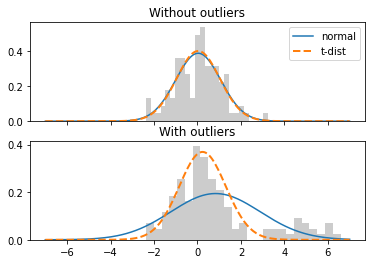

In [171]:
# Generate the data
np.random.seed(12345)
ndata = 100
data = stats.norm.rvs(size=(ndata,))
data2 = stats.norm.rvs(5, size=(20,))
dataWOutlier = np.hstack((data, data2))

# Calculate the fits
fit_gauss_wo = stats.norm.fit(data)
fit_gauss_w = stats.norm.fit(dataWOutlier)

fit_t_wo = stats.t.fit(data)
fit_t_w = stats.t.fit(dataWOutlier)

# Display the fit-results
print('Gaussian distribution: {0} -> {1}'.format(fit_gauss_wo, fit_gauss_w))
print('T-distribution: {0} -> {1}'.format(fit_t_wo[1:], fit_t_w[1:]))
# Fit of "df" is not shown, as it is pretty unstable for large df

# Plot the fitted curves, to both data sets
fitted_x = np.linspace(-7, 7, 200)       # x-values for fitted curves

# Fitted curves to the original data set
fitted_gauss_wo = stats.norm.pdf(fitted_x, loc=fit_gauss_wo[0], scale=fit_gauss_wo[1])
fitted_t_wo = stats.t.pdf(fitted_x, df=ndata-1, loc=fit_t_wo[1], scale=fit_t_wo[2])

# Fitted curves to the data set with outliers
fitted_gauss_w = stats.norm.pdf(fitted_x, loc=fit_gauss_w[0], scale=fit_gauss_w[1])
fitted_t_w = stats.t.pdf(fitted_x, df=ndata-1, loc=fit_t_w[1], scale=fit_t_w[2])

# Show the data
fig, axs = plt.subplots(2,1, sharex=True)

axs[0].hist(data, density=True, bins=25, color='#CCCCCC')
axs[0].plot(fitted_x, fitted_gauss_wo, label='normal')
axs[0].plot(fitted_x, fitted_t_wo, ls='--', lw=2, label='t-dist')
axs[0].set_title('Without outliers')
axs[0].legend()

axs[1].hist(dataWOutlier, density=True, bins=25, color='#CCCCCC')
axs[1].plot(fitted_x, fitted_gauss_w, label='norm')
axs[1].plot(fitted_x, fitted_t_w, ls='--', lw=2, label='t-dist')
axs[1].set_title('With outliers')